# 1. Data Preprocessing

## 1.1. Loading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_credits = pd.read_csv("data/credits.csv")
df_keywords = pd.read_csv("data/keywords.csv")
df_links = pd.read_csv("data/links.csv")
df_movies_metadata = pd.read_csv("data/movies_metadata.csv")
df_ratings = pd.read_csv("data/ratings.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/credits.csv'

In [ ]:
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## 1.2. First Data Understanding and Removing Unnecessary Columns:

To reduce computational time at an early stage, we will remove some unnecessary columns from the dataset.

#### df_ratings, df_credits, df_keywords and df_links

For `df_ratings` we keep all columns.

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


`df_credits`

Let's drop the crew column as it seems not to contain relevant information for a recommender system. We rather want to focus on the cast here.

In [ ]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
df_credits.drop(columns="crew", inplace=True)

For now we keep it like this. We will later extract only the actor's name from the cast column.

**ToDo: clean column "cast" from df_credits (just extract the name)**

`df_keywords`

Let's keep all columns here. We will later extract the keywords from the column "keywords".

In [ ]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
df_keywords.iloc[0,1]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

**ToDo: maybe clean column "keywords" in df_keywords (only keep name)**

`df_links`

Let's keep all columns here

In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### df_movies_metadata

We will also drop some columns for the df_movies_metadata dataset. 

In [ ]:
df_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

`adult`

In [ ]:
df_movies_metadata["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

As only a very small portion of the values are True and we have some wrong entries. The column does not give any insights regarding future model building. Therefore, this column will be dropped.

In [ ]:
df_movies_metadata.drop(columns="adult", inplace=True)

`belongs_to_collection`

In [ ]:
df_movies_metadata[df_movies_metadata["belongs_to_collection"] == "{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
2997,"{'id': 10194, 'name': 'Toy Story Collection', ...",90000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story-2,863,tt0120363,en,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy...",17.547693,...,1999-10-30,4.973669e+08,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The toys are back!,Toy Story 2,False,7.3,3914.0
15348,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193,tt0435761,en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",16.96647,...,2010-06-16,1.066970e+09,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No toy gets left behind.,Toy Story 3,False,7.6,4710.0


It could be possible that there is a value in the column "belongs_to_collection" when there are several versions of the film. However, we are not sure about that yet!

Let's examine the columns `budget` and `revenue`.

In [ ]:
len(df_movies_metadata[df_movies_metadata["revenue"] == 0.0]) / len(df_movies_metadata)

0.8369330928605991

In [ ]:
len(df_movies_metadata[df_movies_metadata["budget"] == "0"]) / len(df_movies_metadata)

0.8044032903708266

84% of all rows in "revenue" and 80% of all rows in "budget" have a value of 0, so those values are simply unknown as it is unrealistic that that many movies have 0 budget and 0 revenue. Therefore, those columns will be dropped.

In [ ]:
df_movies_metadata.drop(columns=["revenue", "budget"], inplace=True)

Let's examine the difference between the columns `original_title` and `title`.

In [ ]:
len(df_movies_metadata[df_movies_metadata["original_title"] != df_movies_metadata["title"]]) / len(df_movies_metadata)

0.2507808032375841

Only 25% original_title values are the same as the title values. Let's examine some cases where we have different entries:

In [ ]:
df_movies_metadata[df_movies_metadata["original_title"] != df_movies_metadata["title"]]

,belongs_to_collection,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28,NaN,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,902,tt0112682,fr,La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,9.822423,/eVo6ewq4akfyJYy3GXkMsLNzEJc.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-05-16,108.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,Where happily ever after is just a dream.,The City of Lost Children,False,7.6,308.0
29,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,37557,tt0115012,zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,1.100915,/qcoOCoN7viOhboGwhYXyApdDuiq.jpg,...,"[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",1995-04-30,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,In 1930's Shanghai violence was not the proble...,Shanghai Triad,False,6.5,17.0
32,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",NaN,78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,0.745542,/k6ODtR38dKEfuzSGjggr8KDyAF4.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1996-09-18,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wings of Courage,False,6.8,4.0
57,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,11010,tt0110877,it,Il postino,Simple Italian postman learns to love poetry w...,10.168437,/qkq2JfINRQi4Iu9VTMMtQFfmGWZ.jpg,...,"[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",1994-09-22,108.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,The Postman,False,7.6,181.0
58,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,99040,tt0112714,fr,Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",0.120789,/8RCRrSAY8e3Qn5p9cNv188ogmZQ.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1995-09-29,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Confessional,False,6.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45453,NaN,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,404604,tt5690142,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,/zZwbntqdfKdVgzH1RoMHa99g0mJ.jpg,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2017-07-07,146.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mom,False,6.6,14.0
45455,NaN,[],NaN,67179,tt0069215,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,0.225051,/j1AN0L4motTt8SBxeTMXDtExsYl.jpg,...,[],1972-01-01,90.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,St. Michael Had a Rooster,False,6.0,3.0
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0


`original title` is in the original language, `title` in English. Therefore, only `title` will be kept.

In [ ]:
df_movies_metadata.drop(columns=["original_title"], inplace=True)

`poster_path`

Let's delete this column as we wont implement any image recognition in our models

In [ ]:
df_movies_metadata.poster_path

0        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4        /e64sOI48hQXyru7naBFyssKFxVd.jpg
                       ...               
45461    /jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464    /aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
45465    /s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg
Name: poster_path, Length: 45466, dtype: object

In [ ]:
df_movies_metadata.drop(columns=["poster_path"], inplace=True)

Let's proceed with the `status` column:

In [ ]:
df_movies_metadata["status"].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

There are some films in the dataset which are not released yet. Those movies are not relevant for a Recommender System. We cut them out and drop the status column.

In [ ]:
df_movies_metadata = df_movies_metadata[df_movies_metadata["status"] == "Released"]
df_movies_metadata.drop(columns=["status"], inplace=True)

Let's look at the `video` column, to understand what it represents:

In [ ]:
df_movies_metadata["video"].value_counts()

False    44921
True        93
Name: video, dtype: int64

Only 93 of the values are True. Let's examine those further:

In [ ]:
df_movies_metadata[df_movies_metadata["video"] == True]

,belongs_to_collection,genres,homepage,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,video,vote_average,vote_count
5492,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.734181,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0
11469,"{'id': 123438, 'name': 'Loose Change Collectio...","[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,What if...September 11th was not a surprise at...,0.651714,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0
13564,NaN,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,A short film in which Quran verses are shown a...,0.040068,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Fitna,True,1.0,1.0
14271,"{'id': 190135, 'name': 'Love Hina Collection',...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,"The tests have come, and Keitaro can only hope...",1.785708,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0
14608,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,[],[],2009-10-13,140.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",NaN,161337,tt2381375,en,Underworld: Endless War is a collection of thr...,3.301063,[],[],2011-10-19,18.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Underworld: Endless War,True,5.6,38.0
44798,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 27, '...",http://www.fat-pie.com/salad.htm,425916,tt1830238,en,"The adventures of Salad Fingers, an unspecifie...",0.141367,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",NaN,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Salad Fingers,True,8.5,4.0
44861,NaN,[],NaN,334795,tt2290966,ru,Four music videos of Kino band joined together...,0.0,[],[],1986-01-01,23.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Victor Tsoy's movie debut,The End of a Vacation,True,0.0,0.0
44981,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,461088,tt5689610,fa,When the corrupted groom starts shooting in th...,0.034119,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2016-03-22,89.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",NaN,50 Kilos of Sour Cherry,True,0.0,0.0


We do not see any patterns in rows where the value of the video column is set to True. Additionally, as there are only 93 instances where this is the case, those rows will be dropped. Also, the column will be kicked as it has no insight for us.

In [ ]:
df_movies_metadata= df_movies_metadata[df_movies_metadata["video"] == False]
df_movies_metadata.drop(columns="video", inplace=True)

On top of that, the following columns will be dropped:
- `homepage`: not relevant for the model
- `tagline`: not relevant for the model

In [ ]:
df_movies_metadata.drop(columns=["homepage", "tagline"], inplace=True)

### Column Formats

Let's check and correct the column formats for every dataframe.

#### df_ratings, df_credits, df_keywords and df_links

In [ ]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
df_credits.dtypes

cast    object
id       int64
dtype: object

In [ ]:
df_keywords.dtypes

id           int64
keywords    object
dtype: object

In [ ]:
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [ ]:
#df_ratings[["userId", "movieId", "timestamp"]].astype("Int64")
df_ratings["rating"] = df_ratings["rating"].astype("Float64")
df_credits["id"] = df_credits["id"].astype("Int64")
df_keywords["id"] = df_keywords["id"].astype("Int64")
df_links[["movieId", "imdbId"]] = df_links[["movieId", "imdbId"]].astype("Int64")

For the column imdbId, let's check if all values are integers and convert them

In [ ]:
if df_links['tmdbId'].dropna().apply(float.is_integer).all():
    df_links['tmdbId'] = df_links['tmdbId'].astype('Int64')
else:
    print("Values have digits after the decimal point.")

#### df_movies_metadata

A first overview shows us that a couple of column formats have to be changed

In [ ]:
df_movies_metadata.dtypes

belongs_to_collection     object
genres                    object
id                        object
imdb_id                   object
original_language         object
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
title                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
df_movies_metadata.head()

,belongs_to_collection,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


`id`

In [ ]:
df_movies_metadata["id"] = df_movies_metadata["id"].astype("Int64")

`imdb_id`

In [ ]:
df_movies_metadata[df_movies_metadata["imdb_id"].notna()]["imdb_id"].sort_values()

43777    tt0000001
32312    tt0000003
19138    tt0000005
17569    tt0000008
25900    tt0000010
           ...    
45179    tt7068896
45200    tt7078780
44969    tt7078926
45085    tt7104950
45371    tt7158814
Name: imdb_id, Length: 44906, dtype: object

All `imbd_id` values start with "tt". Let's delete those letters to align values with other imdb_id columns we have in other dataframes.

In [ ]:
# Let's check if the letters "tt" are in front of every number:

df_movies_metadata_2 = df_movies_metadata.copy()
df_movies_metadata_2["imdb_id"] = df_movies_metadata_2["imdb_id"].astype(str)
df_movies_metadata_2['last_2_chars'] = df_movies_metadata_2['imdb_id'].str[:2]
df_movies_metadata_2['last_2_chars'].value_counts()

tt    44906
na       15
Name: last_2_chars, dtype: int64

In [ ]:
df_movies_metadata["imdb_id"] = df_movies_metadata["imdb_id"].str[2:]

In [ ]:
df_movies_metadata["imdb_id"] = df_movies_metadata["imdb_id"].astype("Int64")

The column popularity seems to be of mixed data types. Therefore, we have to do the conversion in 2 steps.

In [ ]:
df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity'], errors='coerce')
df_movies_metadata['popularity'] = df_movies_metadata['popularity'].astype(int)

In [ ]:
df_movies_metadata['release_date'] = pd.to_datetime(df_movies_metadata['release_date'])

In the next steps, we will look at outliers and missing values. Therefore, we will first merge the dataframes as this will be the final dataset we use for our model building.

In [ ]:
df_keywords.dtypes

id           Int64
keywords    object
dtype: object

In [ ]:
df_links.dtypes

movieId    Int64
imdbId     Int64
tmdbId     Int64
dtype: object

### Missing Values

Let's check and cleanin missing values in our data. To do so, we will merge the dataframes df_keywords, df_links, df_credits, df_movies_metadata. df_ratings will be cleaned seperatly to safe computational time. 

In [ ]:
df_merged = pd.merge(df_keywords, df_links, left_on='id', right_on='tmdbId', how='left')
df_merged = pd.merge(df_merged, df_credits, left_on='id', right_on='id', how='left')
df_merged = pd.merge(df_merged, df_movies_metadata, left_on="imdbId", right_on="imdb_id", how="left")
df_merged.drop(columns=["id_y", "imdb_id"], inplace=True)

#### df_ratings

No NaNs for df_ratings. Therefore, no cleaning necessary.

In [ ]:
print(df_ratings.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


#### df_merged

We have several columns with missing values in the merged dataframe. Let's check and clean them.

In [ ]:
print("Total NaN values:\n ", df_merged.isna().sum())

Total NaN values:
  id_x                         0
keywords                     0
movieId                      0
imdbId                       0
tmdbId                       0
cast                         0
belongs_to_collection    42216
genres                     763
original_language          773
overview                  1714
popularity                 763
production_companies       763
production_countries       763
release_date               832
runtime                   1018
spoken_languages           763
title                      763
vote_average               763
vote_count                 763
dtype: int64


In [ ]:
print("\nShare of NaN values:\n ", (df_merged.isna().sum()) / len(df_merged) * 100)


Share of NaN values:
  id_x                      0.000000
keywords                  0.000000
movieId                   0.000000
imdbId                    0.000000
tmdbId                    0.000000
cast                      0.000000
belongs_to_collection    90.290016
genres                    1.631876
original_language         1.653264
overview                  3.665840
popularity                1.631876
production_companies      1.631876
production_countries      1.631876
release_date              1.779451
runtime                   2.177261
spoken_languages          1.631876
title                     1.631876
vote_average              1.631876
vote_count                1.631876
dtype: float64


We have a high precentage of missing values for 'belongs_to_collection'. These makes sense as not all movies belong to a collection. Therefore, we will leave those NaNs as they are for now.

Also, we can see a pattern for most of the variables where the number of missing values is the same. Overall the percentage of missing values is very low. Let's check for the ratio of missing values in the overall dataset.

In [ ]:
print("Percentage of rows with mising values: ", (df_merged.drop(columns=['belongs_to_collection']).isna().any(axis=1).sum() / len(df_merged)*100).round(2))

Percentage of rows with mising values:  3.8


Let's drop all rows with missing values as they only account for 3.8% of the dataset and we want to ensure data completeness.

In [ ]:
df_merged.dropna(subset=['genres', 'original_language', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count'], inplace=True)

Finally, there are also some columns which contain values such as "xx" or empty lists. Let's investigate those further.

In [ ]:
df_merged

,id_x,keywords,movieId,imdbId,tmdbId,cast,belongs_to_collection,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1,114709,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",2,113497,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3,113228,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...",4,114885,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5,113041,11862,"[{'cast_id': 1, 'character': 'George Banks', '...","{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46750,30840,[],176267,102797,30840,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",en,"Yet another version of the classic epic, with ...",5.0,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Robin Hood,5.7,26.0
46752,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,...",176271,2028550,111109,"[{'cast_id': 1002, 'character': 'Sister Angela...",NaN,"[{'id': 18, 'name': 'Drama'}]",tl,An artist struggles to finish his work while a...,0.0,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Century of Birthing,9.0,3.0
46753,67758,[],176273,303758,67758,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...",NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,"When one of her hits goes wrong, a professiona...",0.0,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Betrayal,3.8,6.0
46754,227506,[],176275,8536,227506,"[{'cast_id': 2, 'character': '', 'credit_id': ...",NaN,[],en,"In a small town live two brothers, one a minis...",0.0,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,87.0

### Check Ranges / Identify Outliers

#### df_ratings

We have ratings from 0 to 5. It seems like overall there are no outliers.

In [ ]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,26024289.0,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.52809,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443,2.052889e+08
min,1.000000e+00,1.000000e+00,0.5,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.0,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.5,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.0,1.357578e+09
max,2.708960e+05,1.762750e+05,5.0,1.501830e+09


#### df_merged

In [ ]:
df_merged.describe()

,id_x,movieId,imdbId,tmdbId,popularity,runtime,vote_average,vote_count
count,44977.0,44977.0,44977.0,44977.0,44977.000000,44977.000000,44977.000000,44977.000000
mean,107499.766258,96594.315161,993058.266492,107499.766258,2.542811,95.137626,5.644396,111.803455
std,111801.363981,57335.768138,1356963.263169,111801.363981,6.005085,37.278343,1.884219,494.857305
min,2.0,1.0,1.0,2.0,0.000000,0.000000,0.000000,0.000000
25%,25943.0,48560.0,82490.0,25943.0,0.000000,85.000000,5.000000,3.000000
50%,59358.0,109284.0,283525.0,59358.0,1.000000,95.000000,6.000000,10.000000
75%,156015.0,146550.0,1543053.0,156015.0,3.000000,107.000000,6.800000,35.000000
max,469172.0,176279.0,7158814.0,469172.0,547.000000,1256.000000,10.000000,14075.000000


We have some unusual values in the columns `popularity`, `runtime`, `vote_count` and `release_date`. Let's check those further.

`popularity`

Text(0, 0.5, 'Popularity')

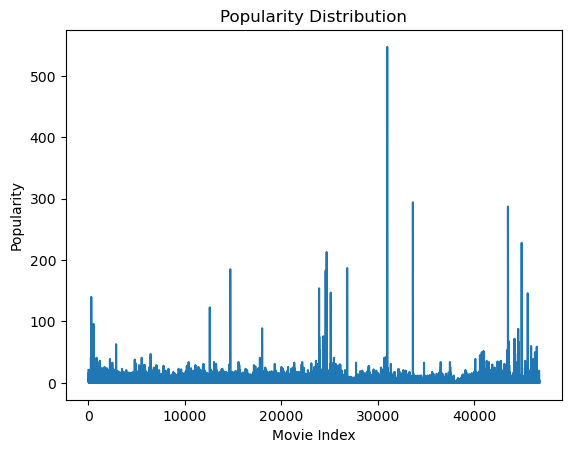

In [ ]:
ax = df_merged['popularity'].plot()

ax.set_title("Popularity Distribution")
ax.set_xlabel("Movie Index")
ax.set_ylabel("Popularity")

In [ ]:
df_merged[df_merged['popularity']>200].sort_values(by="popularity", ascending=False)

,id_x,keywords,movieId,imdbId,tmdbId,cast,belongs_to_collection,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count
30980,211672,"[{'id': 3487, 'name': 'assistant'}, {'id': 179...",135887,2293640,211672,"[{'cast_id': 22, 'character': 'Scarlet Overkil...","{'id': 86066, 'name': 'Despicable Me Collectio...","[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",en,"Minions Stuart, Kevin and Bob are recruited by...",547.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Minions,6.4,4729.0
33641,297762,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",143355,451279,297762,"[{'cast_id': 0, 'character': 'Wonder Woman / D...","{'id': 468552, 'name': 'Wonder Woman Collectio...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,An Amazon princess comes to the world of Man t...,294.0,"[{'name': 'Dune Entertainment', 'id': 444}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-05-30,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Wonder Woman,7.2,5025.0
43498,321612,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...",168366,2771200,321612,"[{'cast_id': 174, 'character': 'Belle', 'credi...",NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,A live-action adaptation of Disney's version o...,287.0,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-03-16,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Beauty and the Beast,6.8,5530.0
44919,339403,"[{'id': 642, 'name': 'robbery'}, {'id': 2076, ...",171763,3890160,339403,"[{'cast_id': 9, 'character': 'Baby', 'credit_i...",NaN,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,After being coerced into working for a crime b...,228.0,"[{'name': 'Big Talk Productions', 'id': 443}, ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2017-06-28,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Baby Driver,7.2,2083.0
24699,177572,"[{'id': 380, 'name': 'brother brother relation...",115617,2245084,177572,"[{'cast_id': 23, 'character': 'Baymax (voice)'...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",en,The special bond that develops between plus-si...,213.0,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-24,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Big Hero 6,7.8,6289.0


`runtime`

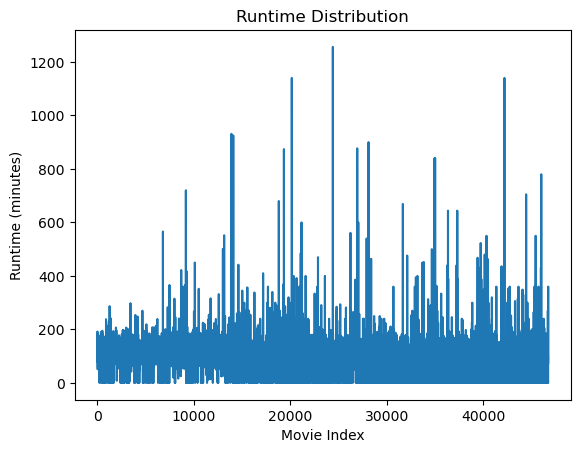

count    44977.000000
mean        95.137626
std         37.278343
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


In [ ]:
ax = df_merged['runtime'].plot()

# Set the title and labels
ax.set_title("Runtime Distribution")
ax.set_xlabel("Movie Index")
ax.set_ylabel("Runtime (minutes)")

# Show the plot
plt.show()

print(df_merged['runtime'].describe())

It seems like we have some unusualy high and unusualy low values. for the runtime.

In [ ]:
num_movies_shorter_than_45min = len(df_merged[df_merged['runtime'] < 45])
percentage = num_movies_shorter_than_45min / len(df_merged) * 100
print("Percentage of movies shorter than 45 min : {:.2f}".format(percentage))

Percentage of movies shorter than 45 min : 6.01


5.78 % of the movies are shorter then 45 min. At this point we decide that we want to recommend movies that are at least 45 min long. Therefore, we will drop those rows. We will also drop all movies that are longer than 300 min (5 hours). This as well is a decision we make at this point regarding the scope of the streaming service at its recommender system. Moreover we can assume several outliers that do not represent real or only experimental movies. The longest cinematic movie ever created is 873 min long. (https://en.wikipedia.org/wiki/List_of_longest_films)

In [ ]:
df_merged = df_merged[(df_merged['runtime'] >= 45) & (df_merged['runtime'] <= 300)]

`vote_count`

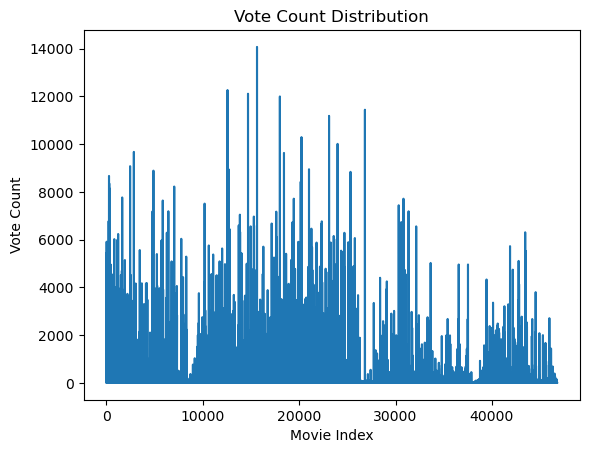

count    42169.000000
mean       118.269392
std        510.284928
min          0.000000
25%          4.000000
50%         11.000000
75%         38.000000
max      14075.000000
Name: vote_count, dtype: float64


In [ ]:
ax = df_merged['vote_count'].plot()

# Set the title and labels
ax.set_title("Vote Count Distribution")
ax.set_xlabel("Movie Index")
ax.set_ylabel("Vote Count")

# Show the plot
plt.show()
print(df_merged['vote_count'].describe())

It seems like we have movies with 0 votes. Let's check those further.

In [ ]:
no_vote = df_merged[(df_merged['vote_count'] == 0) & (df_merged['vote_average'] == 0)]
len(no_vote) / len(df_merged) * 100

5.385472740638858

Let's drop non voted movies, they only represent 5% of the dataset.

In [ ]:
df_merged = df_merged[((df_merged['vote_count'] > 0) & (df_merged['vote_average'] != 0))]

`release_date`

There seems to be something wrong with the Release Date as the earliest date is in the year 1874.

In [ ]:
df_movies_metadata.sort_values(by="release_date")

,belongs_to_collection,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count
34940,NaN,"[{'id': 99, 'name': 'Documentary'}]",315946,3155794,xx,Photo sequence of the rare transit of Venus ov...,0,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1874-12-09,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Passage of Venus,6.0,19.0
34937,NaN,"[{'id': 99, 'name': 'Documentary'}]",194079,2221420,en,Sallie Gardner at a Gallop was one of the earl...,0,"[{'name': 'Palo Alto Stock Farm', 'id': 84748}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1878-06-14,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Sallie Gardner at a Gallop,6.2,25.0
41602,NaN,"[{'id': 99, 'name': 'Documentary'}]",426903,5459794,en,Individual photographs of the running of a buf...,0,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1883-11-19,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Buffalo Running,5.4,7.0
34933,NaN,"[{'id': 99, 'name': 'Documentary'}]",159897,2075247,xx,The last remaining production of Le Prince's L...,1,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1887-08-18,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Man Walking Around a Corner,4.1,17.0
34934,NaN,"[{'id': 99, 'name': 'Documentary'}]",96882,1758563,xx,The last remaining film of Le Prince's LPCCP T...,0,"[{'name': 'Whitley Partners', 'id': 48026}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1888-01-01,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Accordion Player,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,NaN,[],438910,810384,ru,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,0,[],[],NaT,76.0,[],Engineering Red,6.0,2.0
45203,NaN,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",433711,3158690,en,"In a no holds barred documentary, acclaimed jo...",0,[],[],NaT,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",All Superheroes Must Die 2: The Last Superhero,4.0,1.0
45338,NaN,[],335251,1883368,en,An exploration of the musical and social origi...,0,[],[],NaT,0.0,[],The Land Where the Blues Began,0.0,0.0
45410,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",449131,321264,ru,NaN,0,[],"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",NaT,NaN,[],Aprel,6.0,1.0


It turns out that some films actually date back to as early as 1874. Therefore, those rows will be kept.

### Check for duplicates

In [ ]:
df_ratings.duplicated().sum()

0

In [ ]:
df_merged.duplicated().sum()

952

There are 952 duplicates in the df_merged dataset. Let's drop those rows.

In [ ]:
df_merged.drop_duplicates(inplace = True)

In [ ]:
df_merged.head()

,id_x,keywords,movieId,imdbId,tmdbId,cast,belongs_to_collection,genres,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1,114709,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...",21.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",2,113497,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,17.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3,113228,15602,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,A family wedding reignites the ancient feud be...,11.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...",4,114885,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"Cheated on, mistreated and stepped on, the wom...",3.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5,113041,11862,"[{'cast_id': 1, 'character': 'George Banks', '...","{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",en,Just when George Banks has recovered from his ...,8.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [ ]:
df_merged.iloc[0, 5]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

## Column Transformations

Next, we will transform the "belongs_to_collection" column to binary values.

In [ ]:
df_merged['belongs_to_collection'] = df_merged['belongs_to_collection'].notnull().astype(int)

Finally, we will extract some useful information from the columns "cast", "genres", "production_companies", "production_countries" and "spoken_languages".

`cast`

In [ ]:
# "cast" column

import ast

# Attempting to convert 'cast' column into list of dicts (if they're strings) and extract cast names
def extract_cast_names(cast_str):
    try:
        # If cast_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        cast_data = ast.literal_eval(cast_str) if isinstance(cast_str, str) else cast_str
        if isinstance(cast_data, list):
            return [d.get('name') for d in cast_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {cast_str}. Error: {e}")
        return []

# Apply the function to the 'cast' column
df_merged['actors'] = df_merged['cast'].apply(extract_cast_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['id_x', 'actors']].head()

,id_x,actors
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [ ]:
df_merged.drop(columns="cast", inplace=True)

`keywords`

In [ ]:
df_merged.iloc[0, 1]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [ ]:
def extract_keyword_names(keyword_str):
    try:
        # If keyword_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        keywords_data = ast.literal_eval(keyword_str) if isinstance(keyword_str, str) else keyword_str
        if isinstance(keywords_data, list):
            return [d.get('name') for d in keywords_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {keyword_str}. Error: {e}")
        return []

# Apply the function to the 'keywords' column
df_merged['keywords_extracted'] = df_merged['keywords'].apply(extract_keyword_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['id_x', 'keywords_extracted']].head()

,id_x,keywords_extracted
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


`genres`

In [ ]:
df_merged.iloc[0, 5]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [ ]:
# Function to extract genre names
def extract_genre_names(genre_str):
    try:
        # If genre_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        genres_data = ast.literal_eval(genre_str) if isinstance(genre_str, str) else genre_str
        if isinstance(genres_data, list):
            return [d.get('name') for d in genres_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {genre_str}. Error: {e}")
        return []

# Apply the function to the 'genres' column
df_merged['genre_extracted'] = df_merged['genres'].apply(extract_genre_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['id_x', 'genre_extracted']].head()


,id_x,genre_extracted
0,862,"[Animation, Comedy, Family]"
1,8844,"[Adventure, Fantasy, Family]"
2,15602,"[Romance, Comedy]"
3,31357,"[Comedy, Drama, Romance]"
4,11862,[Comedy]


In [ ]:
df_merged.drop(columns="genres", inplace=True)

In [ ]:
df_merged.head()

,id_x,movieId,imdbId,tmdbId,belongs_to_collection,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count,actors,keywords_extracted,genre_extracted
0,862,1,114709,862,1,en,"Led by Woody, Andy's toys live happily in his ...",21.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]"
1,8844,2,113497,8844,0,en,When siblings Judy and Peter discover an encha...,17.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,15602,3,113228,15602,1,en,A family wedding reignites the ancient feud be...,11.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]"
3,31357,4,114885,31357,0,en,"Cheated on, mistreated and stepped on, the wom...",3.0,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]"
4,11862,5,113041,11862,1,en,Just when George Banks has recovered from his ...,8.0,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy]


`Production Company`

In [ ]:
def extract_production_company_names(company_str):
    try:
        # If company_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        companies_data = ast.literal_eval(company_str) if isinstance(company_str, str) else company_str
        if isinstance(companies_data, list):
            return [d.get('name') for d in companies_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {company_str}. Error: {e}")
        return []

# Apply the function to the 'production_companies' column
df_merged['production_company_extracted'] = df_merged['production_companies'].apply(extract_production_company_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['id_x', 'production_company_extracted']].head()

,id_x,production_company_extracted
0,862,[Pixar Animation Studios]
1,8844,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,15602,"[Warner Bros., Lancaster Gate]"
3,31357,[Twentieth Century Fox Film Corporation]
4,11862,"[Sandollar Productions, Touchstone Pictures]"


In [ ]:
df_merged.drop(columns="production_companies", inplace=True)

`Production Country`

In [ ]:
# Function to extract production country names
def extract_production_country_names(country_str):
    try:
        # If country_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        countries_data = ast.literal_eval(country_str) if isinstance(country_str, str) else country_str
        if isinstance(countries_data, list):
            return [d.get('name') for d in countries_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {country_str}. Error: {e}")
        return []

# Apply the function to the 'production_countries' column
df_merged['production_country_extracted'] = df_merged['production_countries'].apply(extract_production_country_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['id_x', 'production_country_extracted']].head()

,id_x,production_country_names
0,862,[United States of America]
1,8844,[United States of America]
2,15602,[United States of America]
3,31357,[United States of America]
4,11862,[United States of America]


In [ ]:
df_merged.drop(columns="production_countries", inplace=True)

`Spoken Languages`

In [ ]:
# Function to extract spoken language names
def extract_spoken_language_names(language_str):
    try:
        # If language_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        languages_data = ast.literal_eval(language_str) if isinstance(language_str, str) else language_str
        if isinstance(languages_data, list):
            return [d.get('name') for d in languages_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {language_str}. Error: {e}")
        return []

# Apply the function to the 'spoken_languages' column
df_merged['spoken_language_extracted'] = df_merged['spoken_languages'].apply(extract_spoken_language_names)

# Check the first few rows to ensure the names are extracted correctly
df_merged[['id_x', 'spoken_language_extracted']].head()

,id_x,spoken_language_names
0,862,[English]
1,8844,"[English, Français]"
2,15602,[English]
3,31357,[English]
4,11862,[English]


In [ ]:
df_merged.drop(columns="spoken_languages", inplace=True)

In [ ]:
df_merged.head()

,id_x,movieId,imdbId,tmdbId,belongs_to_collection,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count,actors,keywords_extracted,genre_extracted,production_company_extracted,production_country_names,spoken_language_names
0,862,1,114709,862,1,en,"Led by Woody, Andy's toys live happily in his ...",21.0,1995-10-30,81.0,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,8844,2,113497,8844,0,en,When siblings Judy and Peter discover an encha...,17.0,1995-12-15,104.0,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,15602,3,113228,15602,1,en,A family wedding reignites the ancient feud be...,11.0,1995-12-22,101.0,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]
3,31357,4,114885,31357,0,en,"Cheated on, mistreated and stepped on, the wom...",3.0,1995-12-22,127.0,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English]
4,11862,5,113041,11862,1,en,Just when George Banks has recovered from his ...,8.0,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English]


## ToDo's in EDA:
- Column "overview" transformieren (an Lucas Notebook orientieren, die haben das auch gemacht)
- checken, ob die Statistiken der Columns "vote_average" und "vote_count" mit denen des df_ratings Dataframe übereinstimmen. Falls nicht können wir diese Columns droppen, da wir df_ratings als "Single Source of Truth" ansehen"

## 2.5 Movie Popularity

In [39]:
# value counts
df_merged['popularity'].value_counts()

popularity
0.0      15722
1.0       7227
2.0       3354
3.0       1958
4.0       1603
         ...  
147.0        1
133.0        1
187.0        1
145.0        1
59.0         1
Name: count, Length: 82, dtype: int64

In [40]:
# minimum and maximum popularity
min_popularity = df_merged['popularity'].min()
max_popularity = df_merged['popularity'].max()

min_popularity, max_popularity

(0.0, 547.0)

- The popularity score ranges from 0 to 547.488
- Popularity is described as "A numeric quantity specifying the movie popularity."
- From IMDB: "Our Most Popular charts use data from the search behavior of IMDb's more than 250 million monthly unique visitors to rank the hottest, most buzzed about movies and TV shows."
- It is difficult to interpret the popularity score without additional context, therefore we will drop this column.

In [41]:
df_merged.drop('popularity', axis=1, inplace=True)

## 2.6 Vote Count and Vote Average

In [54]:
# Min and Max vote count and vote average
min_vote_count = df_merged['vote_count'].min()
max_vote_count = df_merged['vote_count'].max()

min_vote_count, max_vote_count

(1.0, 14075.0)

In [55]:
min_vote_average = df_merged['vote_average'].min()
max_vote_average = df_merged['vote_average'].max()

min_vote_average, max_vote_average

(0.5, 10.0)

- The vote count ranges from 0 to 14075, probably indicating the number of votes the movie received.
- The vote average ranges from 0 to 10, probably indicating the average rating of the movie.

As we have already analyzed the ratings which are provided in the ratings dataframe, we will drop these columns as they are not needed for our analysis.

In [56]:
df_merged.drop(['vote_count', 'vote_average'], axis=1, inplace=True)